<a href="https://colab.research.google.com/github/meghnaparsan/Image-Classification/blob/master/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

categories = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
dataDirectory = '/content/drive/My Drive/DataSet/dataset-resized'

In [0]:
features = []
labels = []

for category in categories:
  path = os.path.join (dataDirectory, category)
  classNumber = categories.index(category)
  for image in os.listdir (path):
    try:
      labels.append (classNumber);
      image_array = cv2.imread (os.path.join (path, image), cv2.IMREAD_UNCHANGED)
      image_resize = cv2.resize (image_array, (50, 50))
      features.append (image_resize)
    except Exception as e:
      pass

In [0]:
print (len (features))
print (len (labels))

print (type (features))
print (type (labels))

2535
2535
<class 'list'>
<class 'list'>


In [0]:
features = np.asarray(features)
labels = np.asarray(labels)

features_train, features_test, labels_train, labels_test = train_test_split (features, labels)

In [0]:
print (len (features_train))
print (len (features_test))
print (len (labels_train))
print (len (labels_test))

# TwoDim_dataset = dataset.reshape(dataset_size,-1)

print (labels_train.shape)
print (labels_test.shape)
X_train = features_train.reshape (1901, -1)
print (X_train.shape)

X_test = features_test.reshape (634, -1)
print (X_test.shape)


1901
634
1901
634
(1901,)
(634,)
(1901, 7500)
(634, 7500)


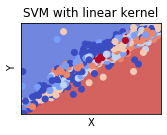

In [0]:
C = 1.0
X_train = X_train [:, : 2]

svc = svm.SVC (kernel = "linear", C = C).fit (X_train, labels_train)
x_min, x_max = X_train [:, 0].min() - 1, X_train [:, 0].max() + 1
y_min, y_max = X_train [:, 1].min() - 1, X_train [:, 1].max() + 1

xx, yy = np.meshgrid(np.arange (x_min, x_max, 0.02),
                     np.arange (y_min, y_max, 0.02))

plt.subplot (2, 2, 1)
plt.subplots_adjust (wspace = 0.4, hspace = 0.4)
Z = svc.predict (np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape (xx.shape)
plt.contourf (xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

plt.scatter (X_train [:, 0], X_train [:, 1], c = labels_train, cmap = plt.cm.coolwarm)
plt.xlabel ("X")
plt.ylabel ("Y")
plt.xlim (xx.min(), xx.max())
plt.ylim (yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title ("SVM with linear kernel")

plt.show()  

In [0]:
predicted = svc.predict (X_test)
accuracy = metrics.accuracy_score (labels_test, predicted)
accuracy

0.43690851735015773

In [0]:
predictedrbf = rbf_svc.predict (X_test)
accuracy = metrics.accuracy_score (labels_test, predictedrbf)
accuracy

0.24921135646687698

In [0]:
poly_svc = svm.SVC (kernel = "poly", degree = 5, C = C).fit (X_train, labels_train)
predictedpoly = poly_svc.predict(X_test)
accuracy = metrics.accuracy_score (labels_test, predictedpoly)
accuracy

0.49053627760252366

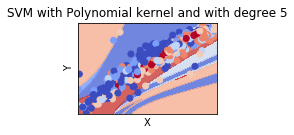

In [0]:
C = 1.0
X_train = X_train [:, : 2]

svc = svm.SVC (kernel = "poly", degree = 5, C = C).fit (X_train, labels_train)
x_min, x_max = X_train [:, 0].min() - 1, X_train [:, 0].max() + 1
y_min, y_max = X_train [:, 1].min() - 1, X_train [:, 1].max() + 1

xx, yy = np.meshgrid(np.arange (x_min, x_max, 0.02),
                     np.arange (y_min, y_max, 0.02))

plt.subplot (2, 2, 1)
plt.subplots_adjust (wspace = 0.4, hspace = 0.4)
Z = svc.predict (np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape (xx.shape)
plt.contourf (xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

plt.scatter (X_train [:, 0], X_train [:, 1], c = labels_train, cmap = plt.cm.coolwarm)
plt.xlabel ("X")
plt.ylabel ("Y")
plt.xlim (xx.min(), xx.max())
plt.ylim (yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title ("SVM with Polynomial kernel and with degree 5")

plt.show()  

In [0]:
poly_svc = svm.SVC (kernel = "poly", degree = 5, C = C).fit (X_train, labels_train)
predictedpoly = poly_svc.predict(X_test)
accuracy = metrics.accuracy_score (labels_test, predictedpoly)
accuracy

0.5220820189274448

In [0]:
modelBag = BaggingClassifier (base_estimator = svm.SVC(kernel = 'poly', degree = 3, C = 1.0), n_estimators = 5).fit (X_train, labels_train)

In [0]:
predict_bag = modelBag.predict (X_test)

In [0]:
accuracy = metrics.accuracy_score (labels_test, predict_bag)
accuracy

0.49369085173501576